In [36]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luisfetoga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
data = pd.read_csv('tipo2_entrenamiento_estudiantes.csv')

In [38]:
data_train, data_test = train_test_split(data, test_size=0.2)
x_train, x_test = data_train["Review"], data_test["Review"]
y_train, y_test = data_train["Class"], data_test["Class"]

In [39]:
class limpieza:

    def solo_letras(self, texto):
        abc = "abcdefghijklmnñopqrstuvwxyz"
        new_texto = ""
        for i in range(len(texto)):
            if texto[i] not in abc:
                new_texto += " "
            else:
                new_texto += texto[i]
        return new_texto

    def limpiar(self):
        self.data = self.data.str.lower()
        self.data = self.data.str.replace("á", "a").str.replace("é", "e").str.replace("í", "i").str.replace("ó", "o").str.replace("ú", "u")
        self.data = self.data.apply(lambda x: self.solo_letras(x))
        return self.data
    
    def stopwords(self):
        stop = stopwords.words("spanish")
        self.data = self.data.apply(lambda x: " ".join([item for item in x.split() if item not in stop]))
        return self.data

    def stem(self):
        stemmer = nltk.SnowballStemmer("spanish")
        self.data = self.data.apply(lambda x: " ".join([stemmer.stem(item) for item in x.split()]))
        return self.data
    
    def fit(self, data, y=None):
        self.data = data
        self.limpiar()
        self.stem()
        self.stopwords()
        return self
    
    def transform(self, data):
        self.data = data
        self.limpiar()
        self.stem()
        self.stopwords()
        return self.data


In [40]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('preprocessor', limpieza()),
    ('vectorizer', TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, ngram_range=(1, 3))),
    ('LogisticRegression', LogisticRegression(max_iter=1000))
])

Fitting...
Fitted! (19.58s)

Predicting...
Predicted! (2.18s)

Exactitud:  0.506
Precisión:  0.498
Recall:  0.506
F1:  0.495


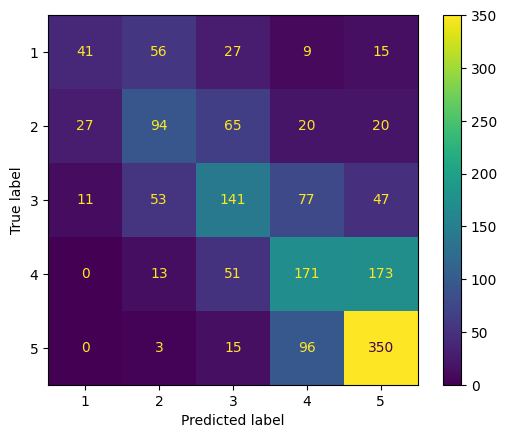

In [41]:
import time
print("Fitting...")
t = time.time()
pipeline.fit(x_train, y_train)
print(f"Fitted! ({round(time.time()-t, 2)}s)")
print()
print("Predicting...")
t = time.time()
pred = pipeline.predict(x_test)
print(f"Predicted! ({round(time.time()-t, 2)}s)")
print()
print("Exactitud: ", round(accuracy_score(y_test, pred), 3))
print("Precisión: ", round(precision_score(y_test, pred, average='weighted'), 3))
print("Recall: ", round(recall_score(y_test, pred, average='weighted'), 3))
print("F1: ", round(f1_score(y_test, pred, average='weighted'), 3))

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()

plt.show()

In [42]:
test = pd.Series(["horrible", "muy bueno", "malo", "excelente", "pésimo", "muy malo"])

result = pipeline.predict(test)
score = pipeline.predict_proba(test)

for i in range(len(test)):
    print(test[i], ":", result[i], "("+str(round(score[i][result[i]-1]*100,2))+"%)")


horrible : 1 (64.59%)
muy bueno : 4 (86.14%)
malo : 2 (57.9%)
excelente : 5 (98.02%)
pésimo : 1 (90.07%)
muy malo : 2 (57.9%)


In [43]:
pipeline.predict_proba(test)

array([[6.45945562e-01, 1.16652195e-01, 7.75519656e-02, 6.45626389e-02,
        9.52876384e-02],
       [5.85156414e-04, 4.89609761e-03, 9.33166868e-02, 8.61381438e-01,
        3.98206216e-02],
       [3.73529192e-01, 5.79026566e-01, 4.22010616e-02, 4.00597782e-03,
        1.23720187e-03],
       [2.18369422e-04, 3.11843333e-04, 6.65480429e-04, 1.86323763e-02,
        9.80171930e-01],
       [9.00713138e-01, 6.44068443e-02, 1.41317653e-02, 9.08908455e-03,
        1.16591675e-02],
       [3.73529192e-01, 5.79026566e-01, 4.22010616e-02, 4.00597782e-03,
        1.23720187e-03]])

In [44]:
from joblib import dump, load

dump(pipeline, 'reviewModel.joblib')

['reviewModel.joblib']